# Cardiovascular Project 

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

# ML and Logic Regresion
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import auc
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Libraries Ready")

Libraries Ready


In [2]:
# Loading Datset
df = pd.read_csv("heart.csv")

#preview dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# exploring number of instances in dataset
print('The number of instances in the heart disease dataset is {}.'.format(df.shape[0]))

The number of instances in the heart disease dataset is 303.


In [7]:
# changing feature labels for better data visualization
# Feature label process adapted from Mar Batlle
df['sex'][df['sex'] == 0] = 'Female'
df['sex'][df['sex'] == 1] = 'Male'

df['cp'][df['cp'] == 0] = 'Typical angina'
df['cp'][df['cp'] == 1] = 'Atypical angina'
df['cp'][df['cp'] == 2] = 'Non-anginal pain'
df['cp'][df['cp'] == 3] = 'Asymptomatic'

df['fbs'][df['fbs'] == 0] = 'Lower than 120mg/ml'
df['fbs'][df['fbs'] == 1] = 'Greater than 120mg/ml'

df['restecg'][df['restecg'] == 0] = 'Normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'Left ventricular hypertrophy'

df['exang'][df['exang'] == 0] = 'No'
df['exang'][df['exang'] == 1] = 'Yes'

df['slope'][df['slope'] == 0] = 'Upsloping'
df['slope'][df['slope'] == 1] = 'Flat'
df['slope'][df['slope'] == 2] = 'Downsloping'

df['thal'][df['thal'] == 1] = 'Normal'
df['thal'][df['thal'] == 2] = 'Fixed defect'
df['thal'][df['thal'] == 3] = 'Reversable defect'

C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jfrui\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added ba

In [8]:
# Change data types to make the analysis easier
df['sex']=df['sex'].astype('object')
df['fbs']=df['fbs'].astype('object')
df['restecg']=df['restecg'].astype('object')
df['exang']=df['exang'].astype('object')
df['thal']=df['thal'].astype('object')
df['target']=df['target'].astype('object')

In [9]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

In [10]:
# checking for missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis

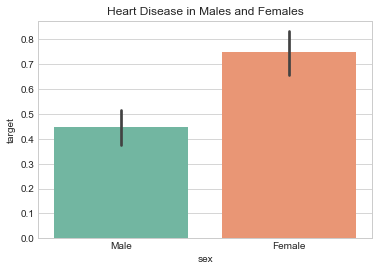

In [12]:
# Exploration of Sex

sns.barplot('sex', 'target', data=df).set_title("Heart Disease in Males and Females")
plt.show()

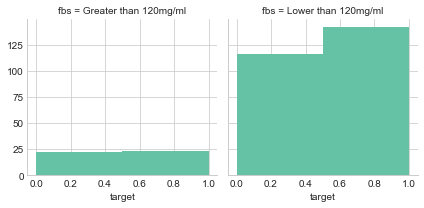

In [14]:
# Exploring Heart Disease based on Fasting Blood Sugar rates

f = sns.FacetGrid(data=df, col = 'fbs')
f.map(plt.hist,'target', bins=2)

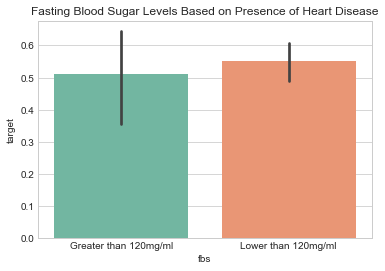

In [15]:
sns.barplot('fbs', 'target', data=df).set_title("Fasting Blood Sugar Levels Based on Presence of Heart Disease")
plt.show()

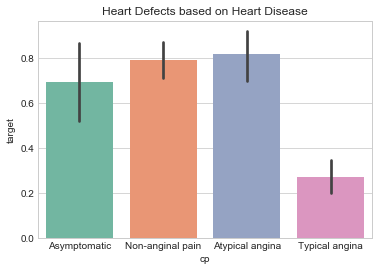

In [17]:
# exploring heart defects 
sns.barplot('cp', 'target', data=df).set_title("Heart Defects based on Heart Disease")
plt.show()

Text(0.5, 1.0, 'Survival Rates')

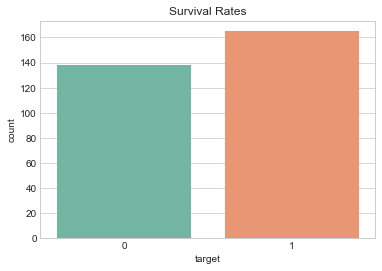

In [19]:
# Visualize the count of heart disease survivors
sns.countplot('target', data=df).set_title("Survival Rates")

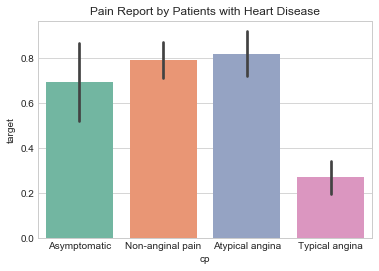

In [21]:
# exploring types of pain reported by patients
sns.barplot('cp', 'target', data=df).set_title("Pain Report by Patients with Heart Disease")
plt.show()

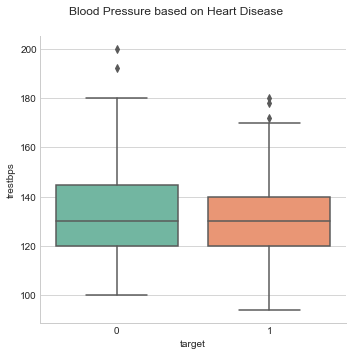

In [24]:
# exploring blood pressure
b = sns.catplot('target','trestbps',data=df, kind='box')
plt.subplots_adjust(top=0.9)
b.fig.suptitle("Blood Pressure based on Heart Disease")
plt.show()

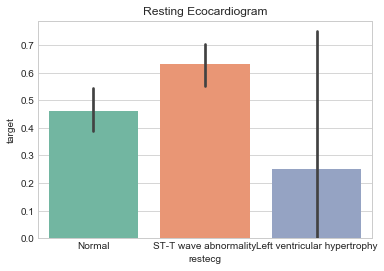

In [25]:
# Exploring Rest Ecocardiogram
sns.barplot('restecg', 'target', data=df).set_title("Resting Ecocardiogram")
plt.show()

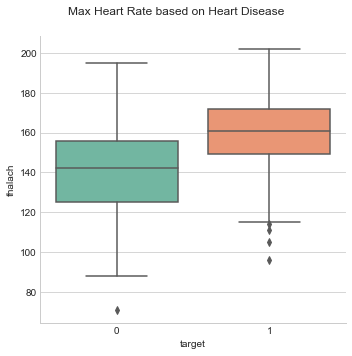

In [26]:
# Exploring Max Heart Rate Feature
m = sns.catplot('target','thalach',data=df, kind='box')
plt.subplots_adjust(top=0.9)
m.fig.suptitle("Max Heart Rate based on Heart Disease")
plt.show()

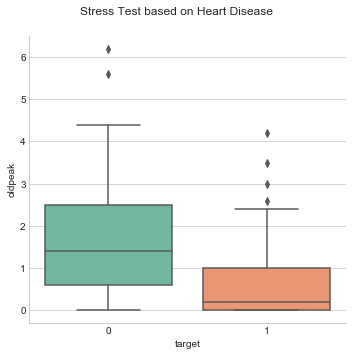

In [28]:
# Stress Test Depression induced by Exercise
s = sns.catplot('target','oldpeak',data=df, kind= 'box')
plt.subplots_adjust(top=0.9)
s.fig.suptitle("Stress Test based on Heart Disease")
plt.show()

C:\Users\jfrui\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


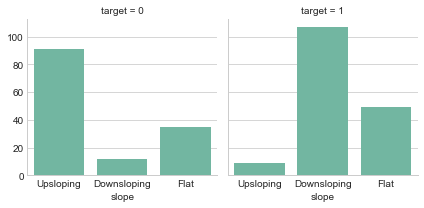

In [30]:
# exploring slope of heart rate based on Heart Disease Diagnosis
g = sns.FacetGrid(data=df, col = 'target')
g.map(sns.countplot,'slope')
plt.show()

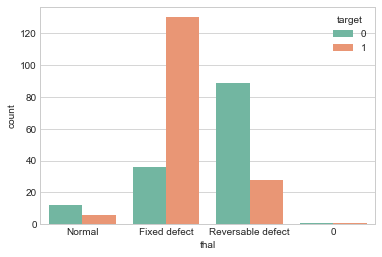

In [32]:
# Exploring Heart Defects (thalesemmia)
sns.countplot('thal',data=df, hue='target')

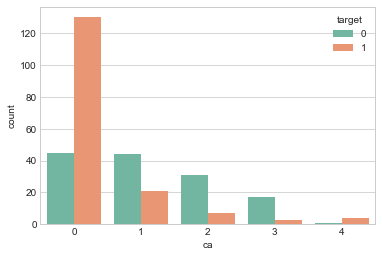

In [36]:
# exploring number of major vessels in heart
sns.countplot('ca',data=df, hue='target')

# Logistic Regression
### Feature Selection Based on EDA

In [38]:
# creating a copy of the dataframe
final = df.copy()
final.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,Greater than 120mg/ml,Normal,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-anginal pain,130,250,Lower than 120mg/ml,ST-T wave abnormality,187,No,3.5,Upsloping,0,Fixed defect,1
2,41,Female,Atypical angina,130,204,Lower than 120mg/ml,Normal,172,No,1.4,Downsloping,0,Fixed defect,1
3,56,Male,Atypical angina,120,236,Lower than 120mg/ml,ST-T wave abnormality,178,No,0.8,Downsloping,0,Fixed defect,1
4,57,Female,Typical angina,120,354,Lower than 120mg/ml,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,Fixed defect,1


In [39]:
# Based on EDA, will be removing resting beats per minute and resting ECG features. 
# Chose to leave FBS and chol as they have limited impact

In [41]:
final.drop('trestbps', axis=1, inplace=True)
final.drop('restecg', axis=1, inplace=True)
final.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-anginal pain,187,No,3.5,Upsloping,0,Fixed defect,1
2,41,Female,Atypical angina,172,No,1.4,Downsloping,0,Fixed defect,1
3,56,Male,Atypical angina,178,No,0.8,Downsloping,0,Fixed defect,1
4,57,Female,Typical angina,163,Yes,0.6,Downsloping,0,Fixed defect,1


In [42]:
# creating dummy variables for logistic regression
final = pd.get_dummies(final, drop_first = True)

In [43]:
final.head(5)

,age,thalach,oldpeak,ca,sex_Male,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,exang_Yes,slope_Flat,slope_Upsloping,thal_Fixed defect,thal_Normal,thal_Reversable defect,target_1
0,63,150,2.3,0,1,0,0,0,0,0,1,0,1,0,1
1,37,187,3.5,0,1,0,1,0,0,0,1,1,0,0,1
2,41,172,1.4,0,0,1,0,0,0,0,0,1,0,0,1
3,56,178,0.8,0,1,1,0,0,0,0,0,1,0,0,1
4,57,163,0.6,0,0,0,0,1,1,0,0,1,0,0,1


In [44]:
# creating test train split
x=final.iloc[:,0:13]
y=final['target_1']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [45]:
# looking at the shape of test train split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [46]:
# viewing x and y training datasets
x_train.head(5)

,age,thalach,oldpeak,ca,sex_Male,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,exang_Yes,slope_Flat,slope_Upsloping,thal_Fixed defect,thal_Normal
286,59,162,0.8,2,1,0,0,0,0,0,0,1,0
102,63,179,0.0,2,0,1,0,0,0,0,0,1,0
242,64,132,2.0,2,1,0,0,1,0,1,0,0,1
65,35,182,1.4,0,0,0,0,1,0,0,0,1,0
35,46,160,1.4,0,0,0,1,0,1,0,1,1,0


In [47]:
y_train.head()

286    0
102    1
242    0
65     1
35     1
Name: target_1, dtype: uint8

### Building the model

In [49]:
logit_model = sm.Logit(y, x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               target_1   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Fri, 22 Jan 2021   Pseudo R-squ.:                     inf
Time:                        13:51:43   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0034      0.015     -0.222      0.825      -0.034       0.027
thalach

C:\Users\jfrui\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jfrui\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jfrui\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [50]:
# predicting presence of heart disease and model accuracy
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.78      0.81      0.79        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [52]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[29  6]
 [ 5 21]]


# Random Forest Classifier

In [2]:
df2 = pd.read_csv("heart.csv")
df2.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# examining number of instances of heart disease
df2.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
# designating features for random forest model
features = df2.iloc[:, 0:13]
label = df2['target']

features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


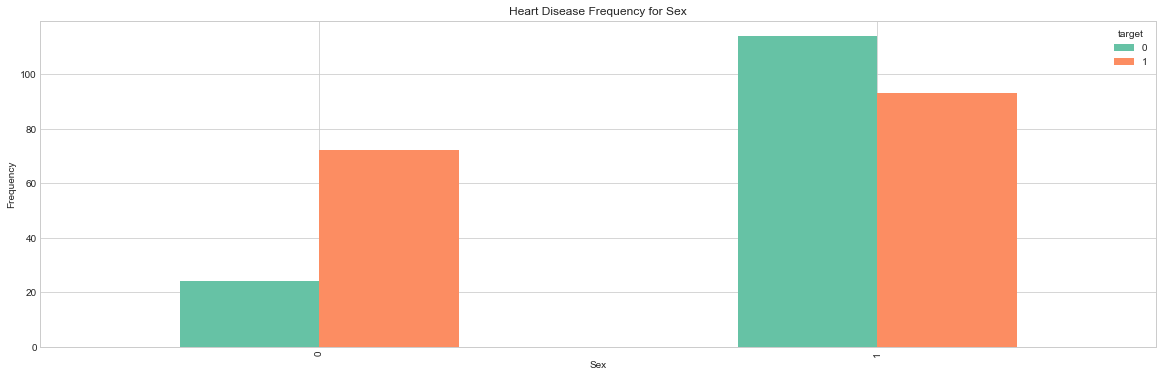

In [5]:
# examining frequency of heart disease based on sex and age
pd.crosstab(df2.sex,df2.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

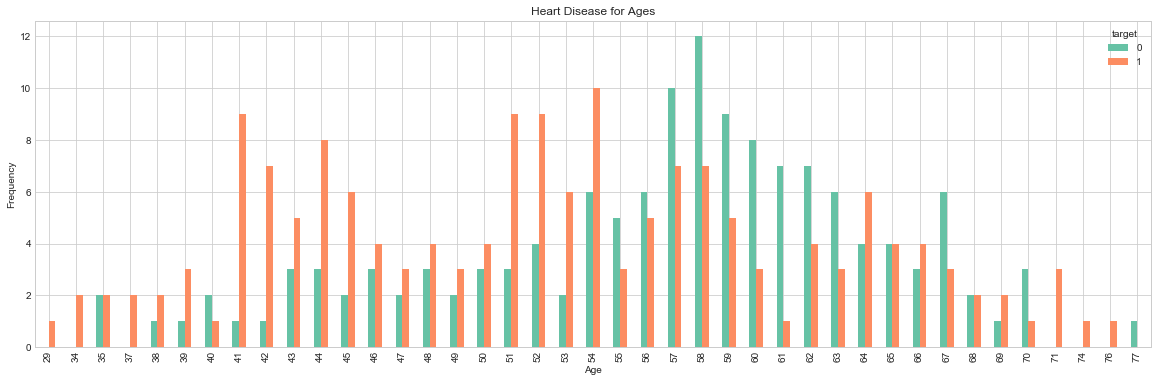

In [7]:
pd.crosstab(df2.age,df2.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [8]:
# importing libraries for random forest
from sklearn import ensemble
rand = ensemble.RandomForestClassifier()

In [9]:
from sklearn.model_selection import train_test_split

In [16]:
# using different logistic regression method in conjunction with random forest
from sklearn import linear_model
log = linear_model.LogisticRegression()

In [17]:
# creating test train split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [11]:
# fitting the training data to the classifier
rand.fit(X_train, y_train)

C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
log.fit(X_train, y_train)

C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred_rand = rand.predict(X_test)
pred_log = log.predict(X_test)

In [20]:
print(pred_rand)
print(pred_log)

[1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1]
[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1]


In [24]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rand)
print(cm)

[[15  0]
 [ 0 16]]


In [21]:
#logistic regression 2nd test confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_log)
print(cm)

[[13  2]
 [ 0 16]]


In [22]:
# examining classifier accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_rand)

1.0

In [23]:
# examining logistic regression accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_log)

0.9354838709677419